In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Microsoft\Downloads\Amazon Sales data.csv")

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [5]:
#3. DIsplaying basic information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
#Display summary satoistics
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


# data cleaning

In [7]:
#1.checking for missing values
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
#convert the order date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
#extract year and month from the 'order date'
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
#convert the ship date column to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#extract year and month from the 'order date'
df['Year']=df['Ship Date'].dt.year
df['Month']=df['Ship Date'].dt.month
# Handle missing values
df.dropna(inplace=True)
df['Sales Channel'] = df['Sales Channel'].astype('string')
df['Region'] = df['Region'].astype('string')
df['Country'] = df['Country'].astype('string')
df['Item Type'] = df['Item Type'].astype('string')
df['Order Priority'] = df['Order Priority'].astype('string')
# Convert 'Price Each' and other numeric columns to appropriate data types
df['Unit Price'] = df['Unit Price'].astype(float)

In [9]:
df.dtypes

Region            string[python]
Country           string[python]
Item Type         string[python]
Sales Channel     string[python]
Order Priority    string[python]
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
Year                       int32
Month                      int32
dtype: object

In [10]:
# Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month'])['Unit Price'].sum().reset_index()
# Yearly sales trend
yearly_sales = df.groupby('Year')['Unit Price'].sum().reset_index()
# Yearly-monthly sales trend
yearly_monthly_sales = df.groupby(['Year', 'Month'])['Unit Price'].sum().reset_index()
monthly_sales.head()
yearly_sales.head()
yearly_monthly_sales.head()

,Year,Month,Unit Price
0,2010,2,437.20
1,2010,3,109.28
2,2010,5,9.33
3,2010,6,255.28
4,2010,8,109.28


In [16]:
# Calculate total sales
total_sales = df['Unit Price'].sum()
# Calculate average sales per order
average_sales_per_order = df['Unit Price'].mean()
# Calculate total orders
total_orders = df['Order ID'].nunique()


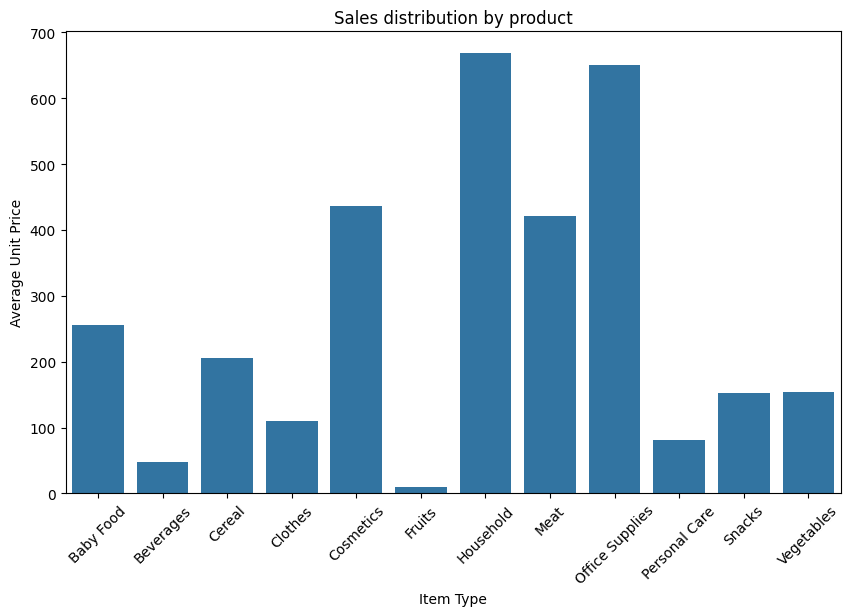

Total Sales: 27676.13
Average Sales per Order: 276.7613
Total Orders: 100


In [20]:
# Group by 'Item Type' and calculate the average 'Unit Price'
avg_price_by_product = df.groupby('Item Type')['Unit Price'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_product.index, y=avg_price_by_product.values)
plt.title('Sales distribution by product')
plt.xlabel('Item Type')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.show()

print("Total Sales:", total_sales)
print("Average Sales per Order:", average_sales_per_order)
print("Total Orders:", total_orders)


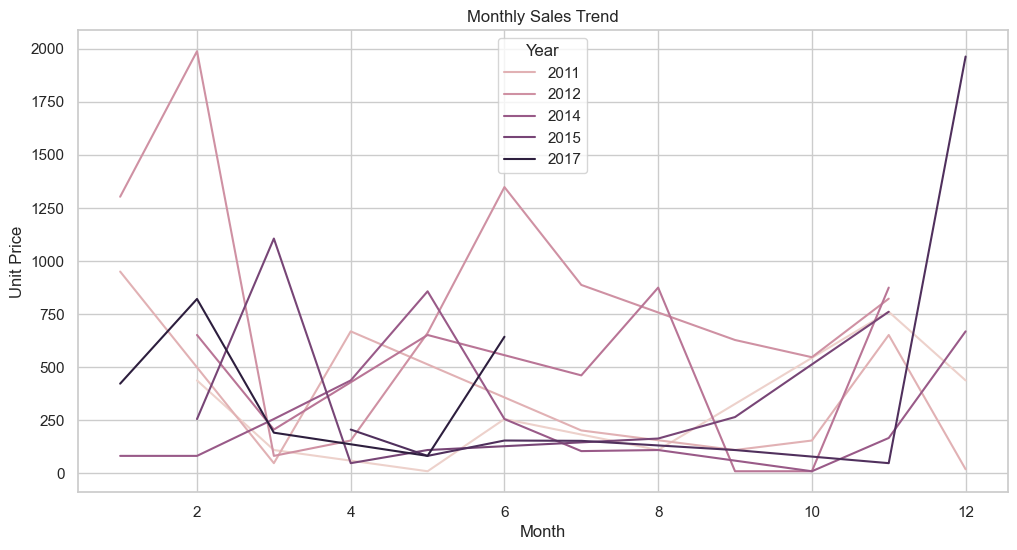

In [15]:
# Set up the visualizations
sns.set(style="whitegrid")

# Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Unit Price', hue='Year')
plt.title('Monthly Sales Trend')
plt.show()

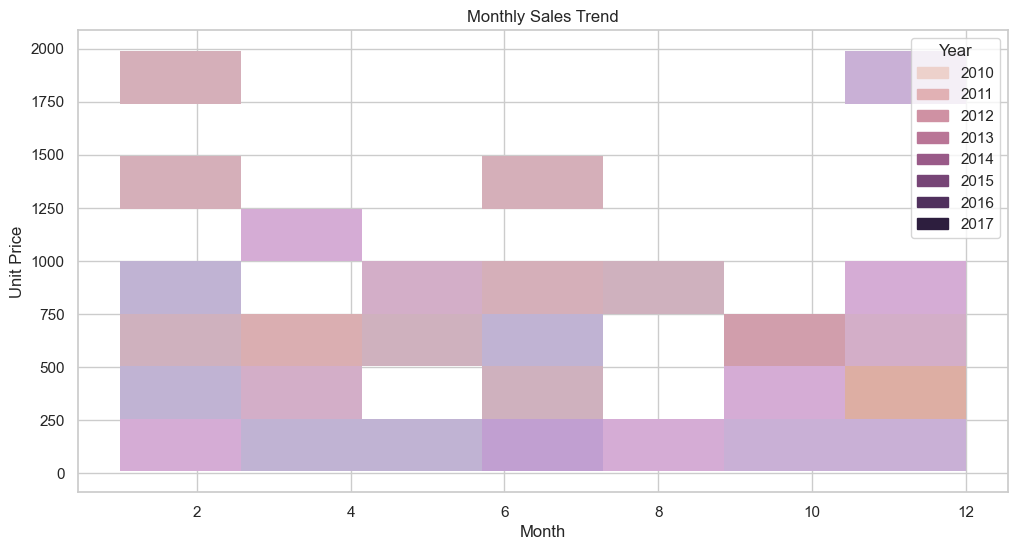

In [16]:
# Set up the visualizations
sns.set(style="whitegrid")

# Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.histplot(data=monthly_sales, x='Month', y='Unit Price', hue='Year')
plt.title('Monthly Sales Trend')
plt.show()

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_9552\4080165921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='Year', y='Unit Price', palette="viridis")


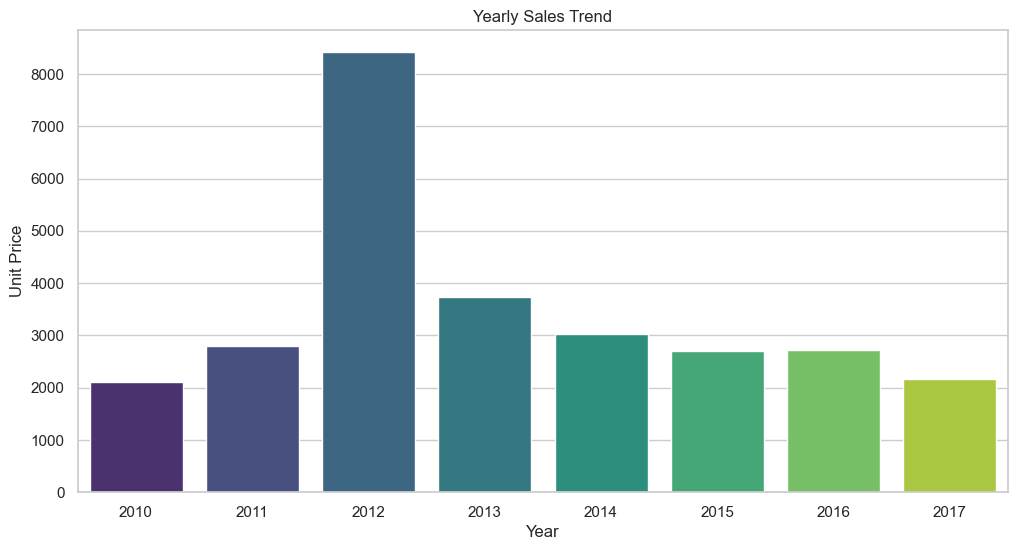

In [17]:
# Yearly Sales Trend
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_sales, x='Year', y='Unit Price', palette="viridis")
plt.title('Yearly Sales Trend')
plt.show()

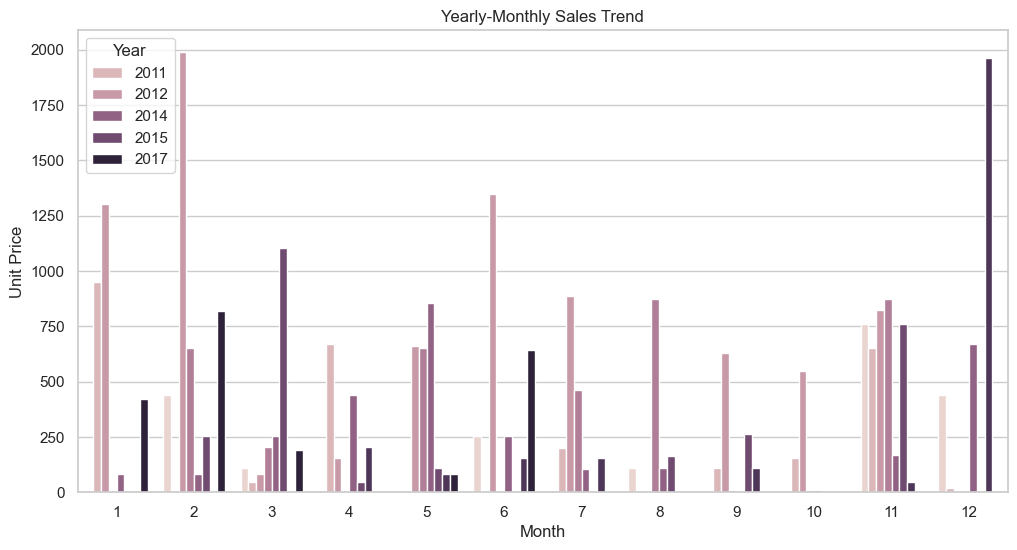

In [18]:
# Yearly-Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_monthly_sales, x='Month', y='Unit Price', hue='Year')
plt.title('Yearly-Monthly Sales Trend')
plt.show()

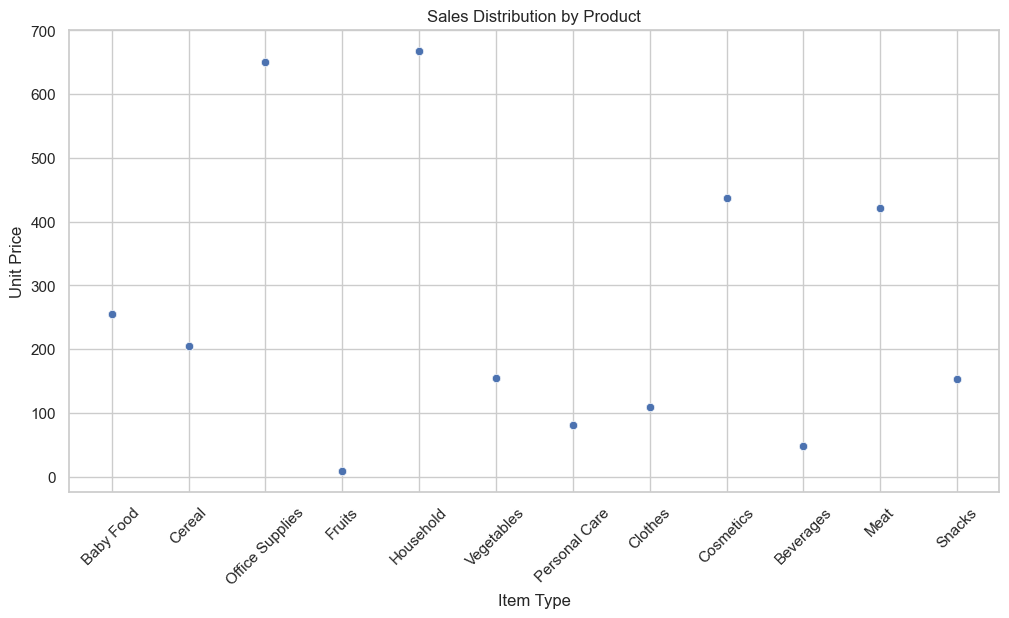

In [19]:
# Sales Distribution by Product
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Item Type', y='Unit Price')
plt.title('Sales Distribution by Product')
plt.xticks(rotation=45)
plt.show()

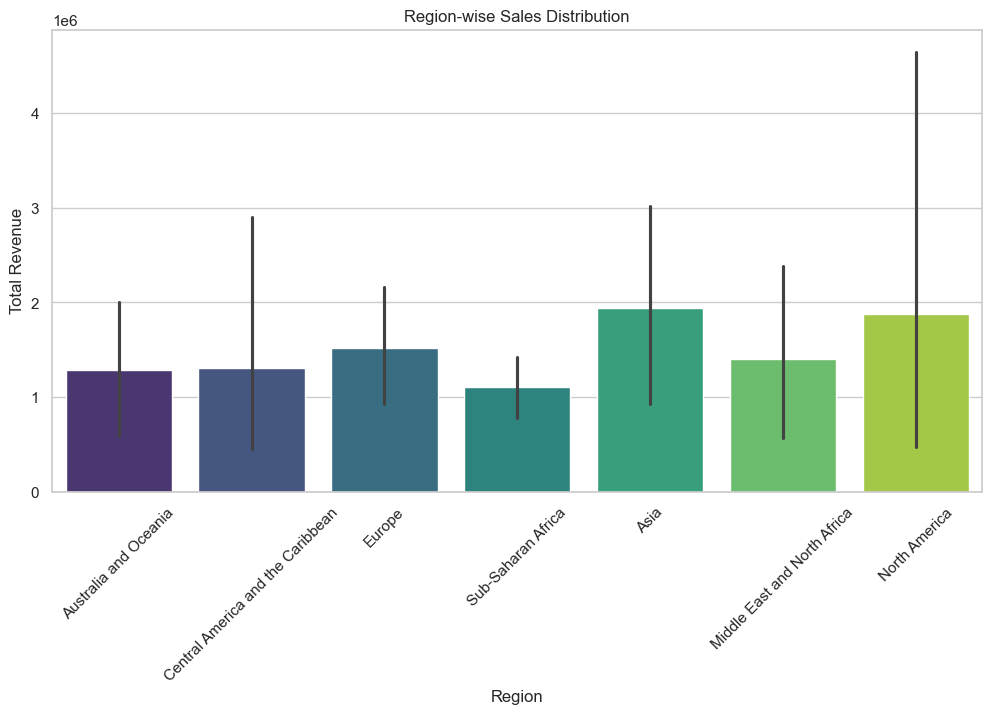

In [40]:
#region wise sales distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Total Revenue',hue = 'Region',palette="viridis")
plt.title('Region-wise Sales Distribution')
plt.xticks(rotation=45)
plt.show()


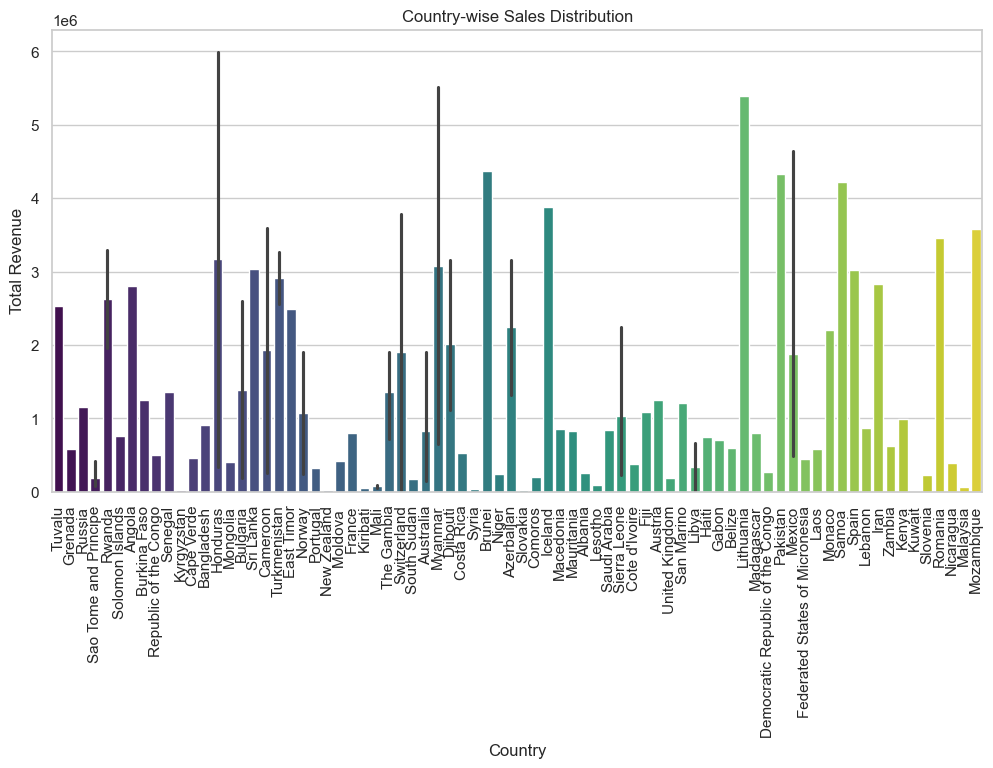

In [41]:
#country wise sales distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country', y='Total Revenue',hue = 'Country',palette="viridis")
plt.title('Country-wise Sales Distribution')
plt.xticks(rotation=90)
plt.show()


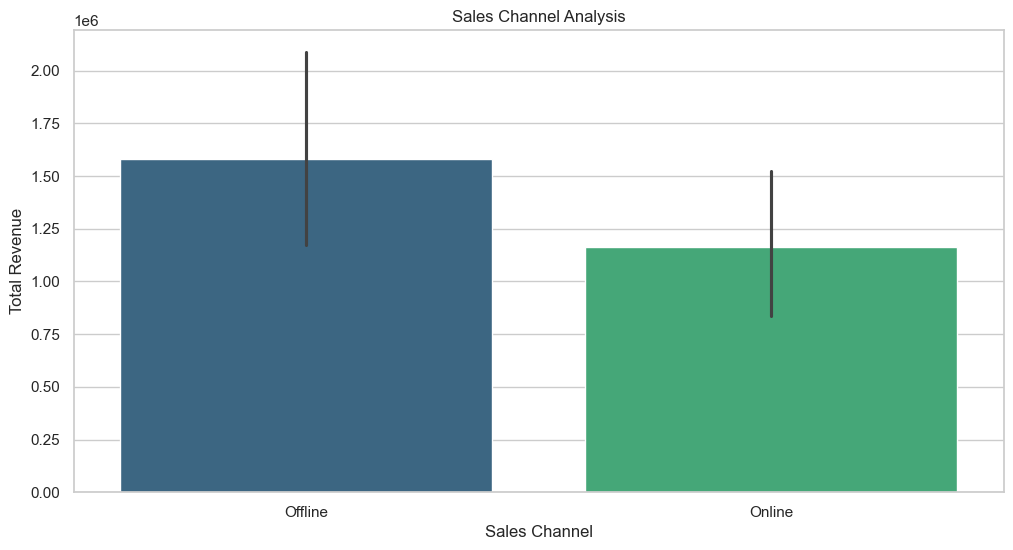

In [42]:
#sales analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sales Channel', y='Total Revenue',hue='Sales Channel', palette="viridis")
plt.title('Sales Channel Analysis')
plt.show()


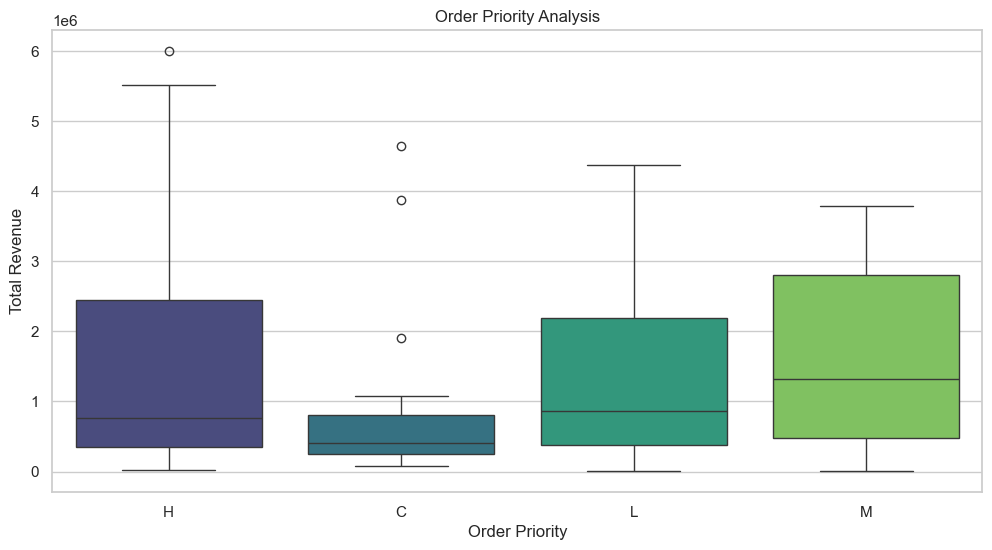

In [46]:
#order priority analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Order Priority', y='Total Revenue',hue='Order Priority',palette="viridis")
plt.title('Order Priority Analysis')
plt.show()


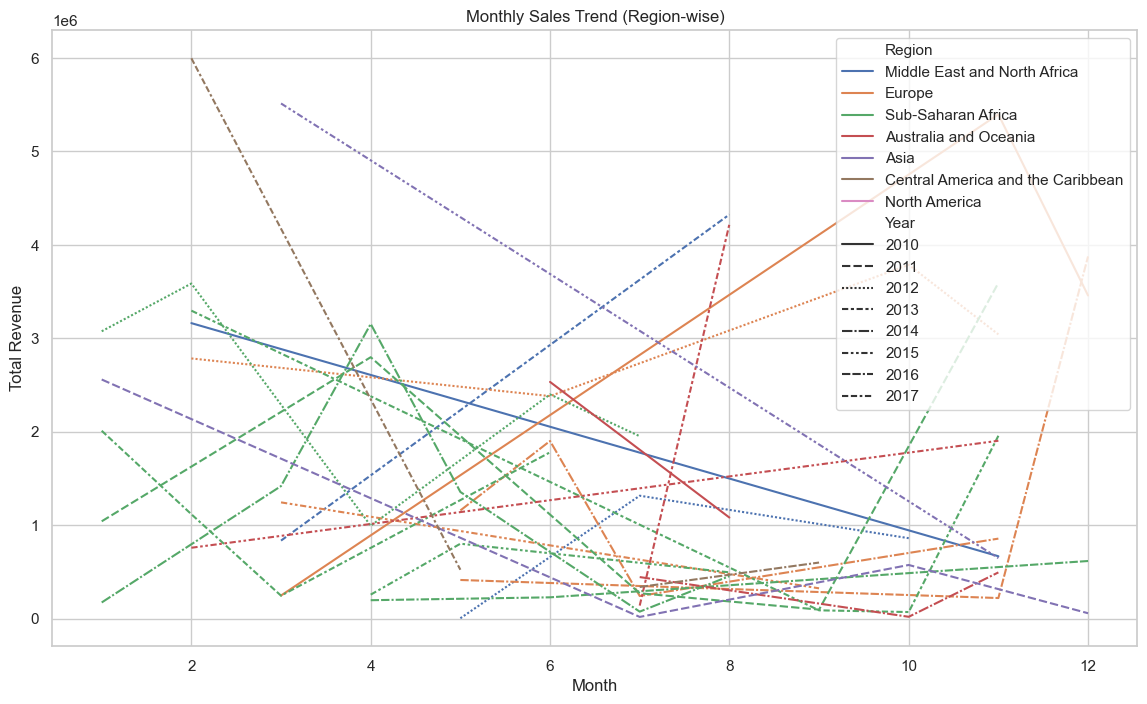

In [27]:
#monthly sales trend
monthly_region_sales = df.groupby(['Year', 'Month', 'Region'])['Total Revenue'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_region_sales, x='Month', y='Total Revenue', hue='Region', style='Year')
plt.title('Monthly Sales Trend (Region-wise)')
plt.show()


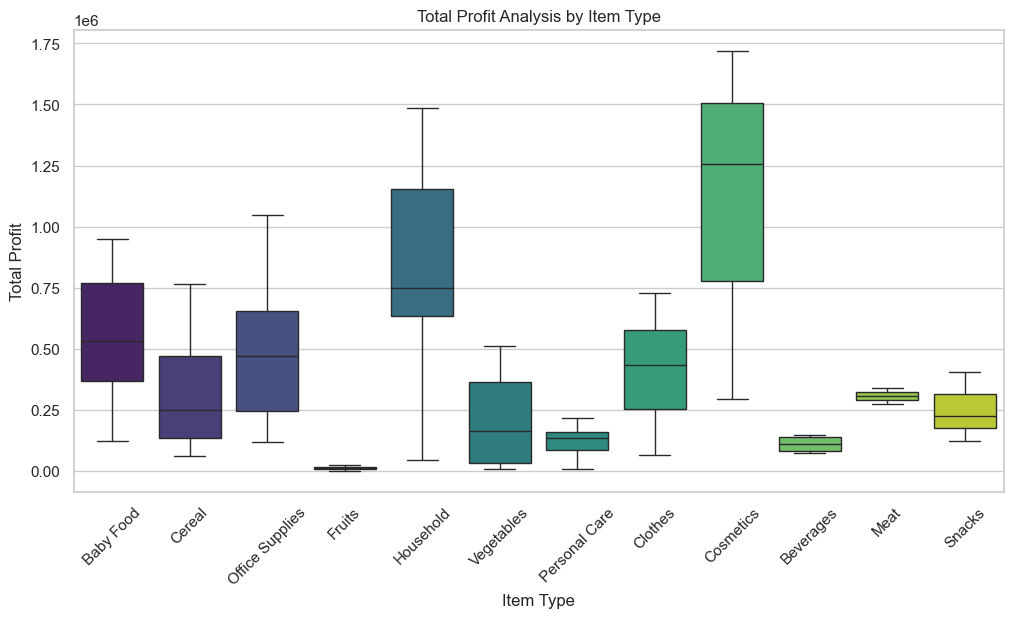

In [47]:
#total profit analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Item Type', y='Total Profit',hue='Item Type',palette="viridis")
plt.title('Total Profit Analysis by Item Type')
plt.xticks(rotation=45)
plt.show()


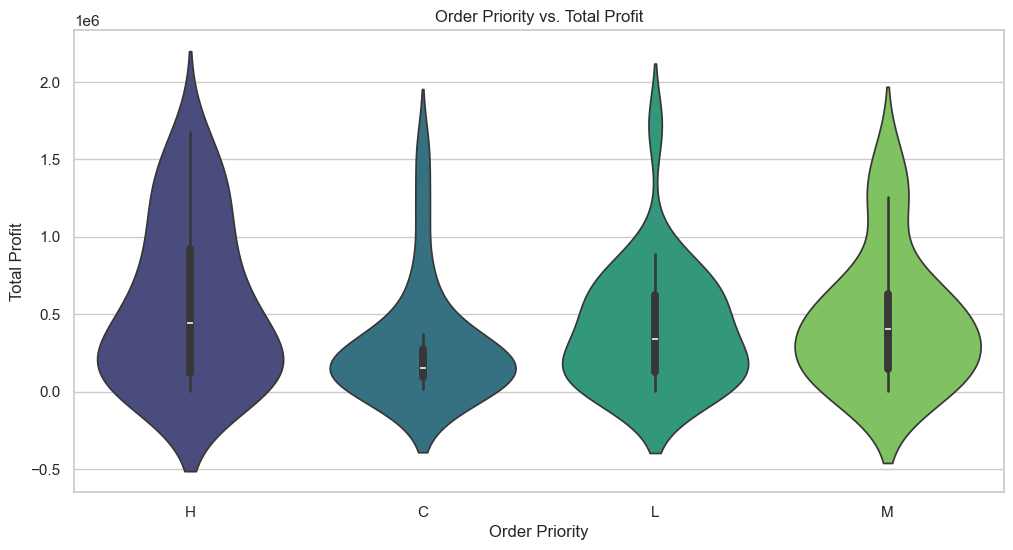

In [48]:
#Order Priority vs. Total Profit
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Order Priority', y='Total Profit',hue='Order Priority', palette="viridis")
plt.title('Order Priority vs. Total Profit')
plt.show()


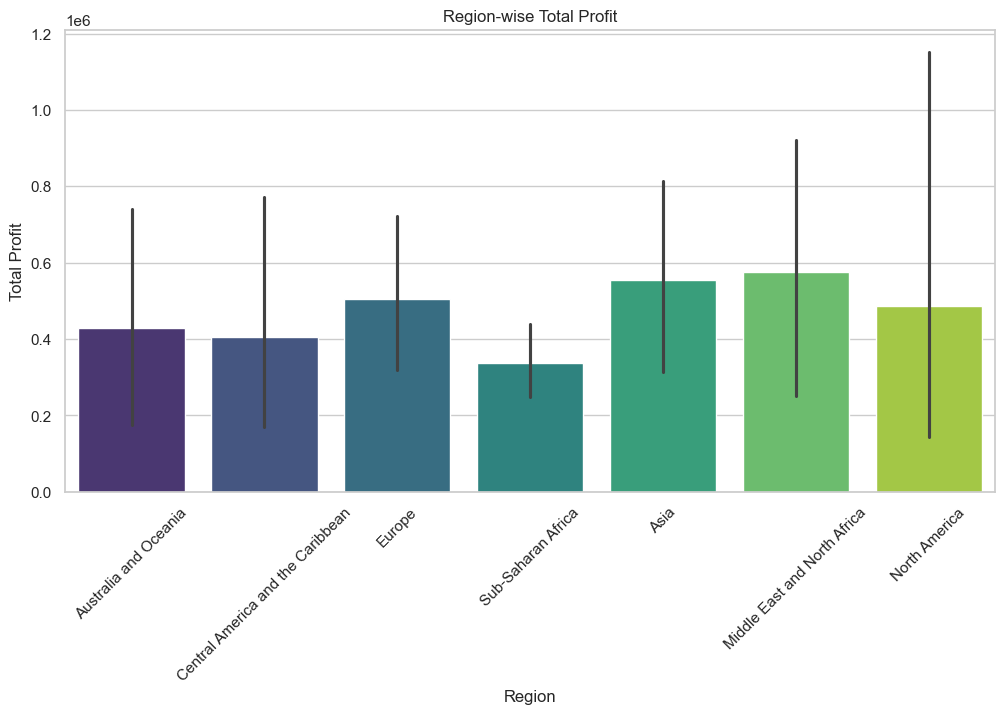

In [49]:
#region wise total profit
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Total Profit', hue='Region',palette="viridis")
plt.title('Region-wise Total Profit')
plt.xticks(rotation=45)
plt.show()


C:\Users\Microsoft\AppData\Local\Temp\ipykernel_9552\2898471386.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


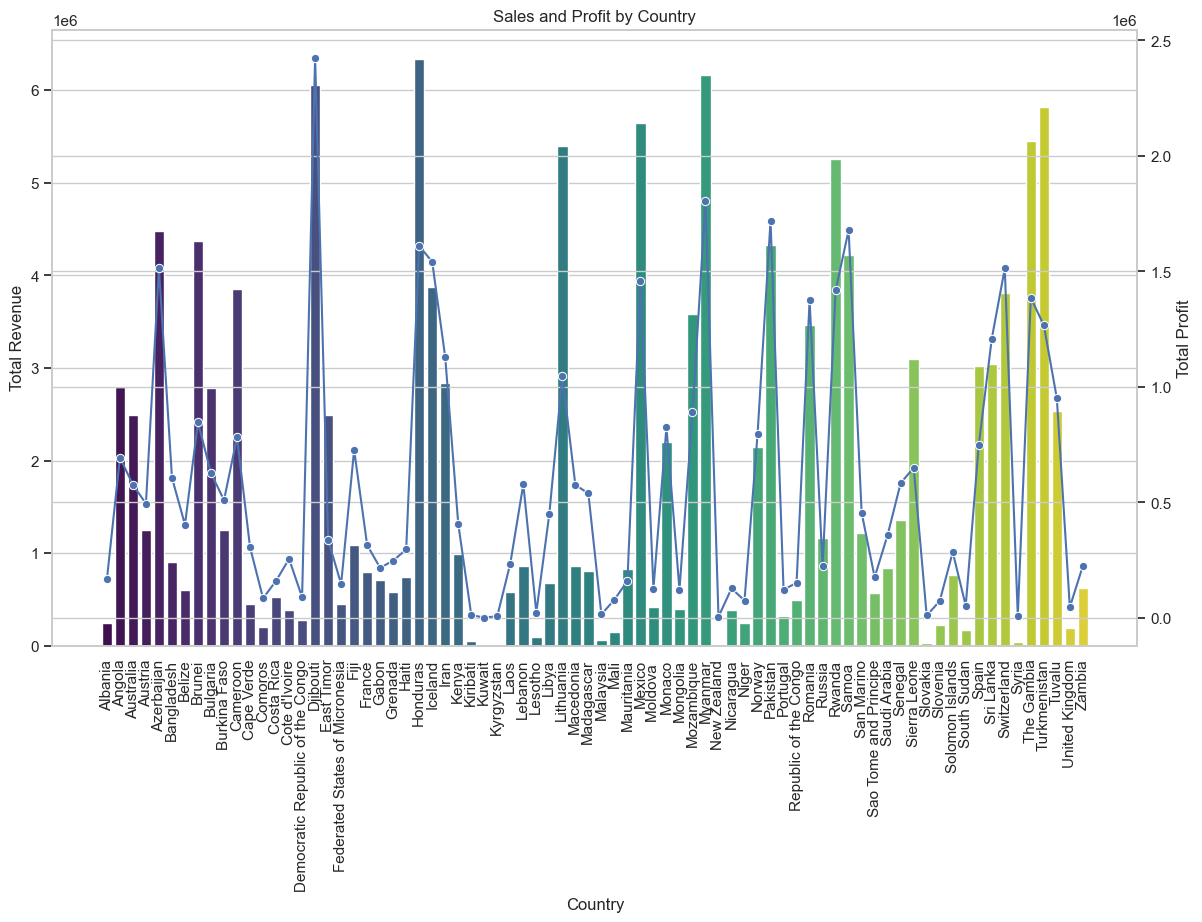

In [50]:
#sales and profit by country
country_sales_profit = df.groupby('Country')[['Total Revenue', 'Total Profit']].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(data=country_sales_profit, x='Country', y='Total Revenue',hue='Country',ax=ax1, palette="viridis")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel('Total Revenue')
ax1.set_title('Sales and Profit by Country')
ax2 = ax1.twinx()
sns.lineplot(data=country_sales_profit, x='Country', y='Total Profit', ax=ax2, color='b', marker='o')
ax2.set_ylabel('Total Profit')
plt.show()

